
# Equations of Motion

In [1]:
import sympy as sp
import sympy.physics.mechanics as me 
import numpy as np
from sympy.utilities.iterables import flatten

sp.init_printing()

# Start with the rocket motor in rocket body coords

<img src="RocketBodyFrames.jpeg" alt="Drawing" style="width: 400px;"/>

Assume to reference frames $N(B)$ and $N(B_1)$ corresponding to the reference frame through the rocket center of mass $(CM)$  and the rocket motor respectively.  
$\vec{b}$ is the vector in the $N(B)$ frame to the $N(B_1)$ frame

The thrust vector ${T}$ is defined in the $N(B_1)$ frame. From a control perspective ${T}$ will be defined as a magnitude and two angles (rotations around $\vec{x}$ and $\vec{y}$ measured from the $z$ axis) relative to the $N(B_1)$ frame. Since there are two motors ($M1$ and $M2$) the magnitude of ${T}$ is the sum of ${T}_{M1}$ and ${T}_{M2}$

$${T}^{control}= u =\begin{bmatrix}
           T_{M1} \\
           T_{M2} \\
           \theta_x \\
           \theta_y 
         \end{bmatrix}$$

This can be transformed into $N(B_1)$ frame as follows:
$$T=\begin{bmatrix}
        (T_{M1}+T_{M2})  \cos{\theta_x} \sin{\theta_y}\\
           -(T_{M1}+T_{M2}) \sin{\theta_x} \cos{\theta_y} \\
           (T_{M1}+T_{M2}) \cos{\theta_x} \cos{\theta_y} 
         \end{bmatrix}$$


In [2]:
Tm1, Tm2, Tm, thrust_angle_x, thrust_angle_y = sp.symbols(['T_M1','T_M2','T_M','theta_thrust_x', 'theta_thrust_y'])

In [3]:
T_control = sp.Matrix([Tm1, Tm2, thrust_angle_x, thrust_angle_y])
T_control

⎡   T_M1   ⎤
⎢          ⎥
⎢   T_M2   ⎥
⎢          ⎥
⎢θₜₕᵣᵤₛₜ ₓ ⎥
⎢          ⎥
⎣θ_thrust_y⎦

<img src="PropRotation.jpeg" alt="Drawing" style="width: 400px;"/>

The total thrust is $T_{M1} + T_{M2}$

Source of the following analysis: https://m-selig.ae.illinois.edu/pubs/DetersAnandaSelig-2014-AIAA-2014-2151.pdf

$T$ : Propeller thrust  
$C_T$ : Propeller thrust coefficient   
$\rho$ : density of air   
$D$ : Propeller diameter  
$n$ : Propeller speed $revolutions/s$

$$\begin{align} 
T_{M1} = C_T \rho D^4n_{M1}^2 \tag{1}
\end{align}$$

$$T_{M2} = C_T \rho D^4n_{M2}^2 \tag{2}$$

when there is is a difference in thrust between the motors a torque arises.

The paper above characterizes propellers in terms of their thrust coefficient ($C_T$) and their power coefficients ($C_P$)

The power input to a prop is the product of the torque and the rotational speed:  
$$ P = 2 \pi n \tau \tag{3}$$

The power coefficient is defined as:

$$C_P = \frac{P}{\rho n^2D^4} \tag{4}$$

Substituting 4 into 3 and solving for $\tau$: 


$$ \tau = \frac{C_P \rho}{2 \pi}D^5 n^2 \tag{5}$$

Assume that the throttle command to the motor is proportional to the rotational velocity $n$ and the rotational speed of the motors are $n_{M1}$ and $n_{M2}$, then the net torque is:

$$ \tau_{M1}-\tau_{M2} = \frac{C_P \rho}{2 \pi}D^5 (n_{M1}^2- n_{M2}^2) \tag{6}$$

Substituting $(1)$ and $(1)$ into  $(6)$:

$$ \tau_{M1}-\tau_{M2} = \frac{C_P \rho}{2 \pi}D^5 ((\frac{T_{M1} }{C_T \rho D^4})- (\frac{T_{M2} }{C_T \rho D^4})) $$

$$ \tau_{M1}-\tau_{M2} = \frac{D C_P }{2 \pi C_T}(T_{M1}- T_{M2}) \tag{7}$$

From the propeller data in the source above it can be seen that the ratio $\frac{C_P}{C_T}$ is quite constant for most small drone propellers over their operating range of Reynolds numbers. 

$$\frac{C_P}{C_T} = 0.5$$

$$ \Delta\tau_{M1-M2} = \frac{D}{4 \pi}(T_{M1}- T_{M2}) \tag{8}$$

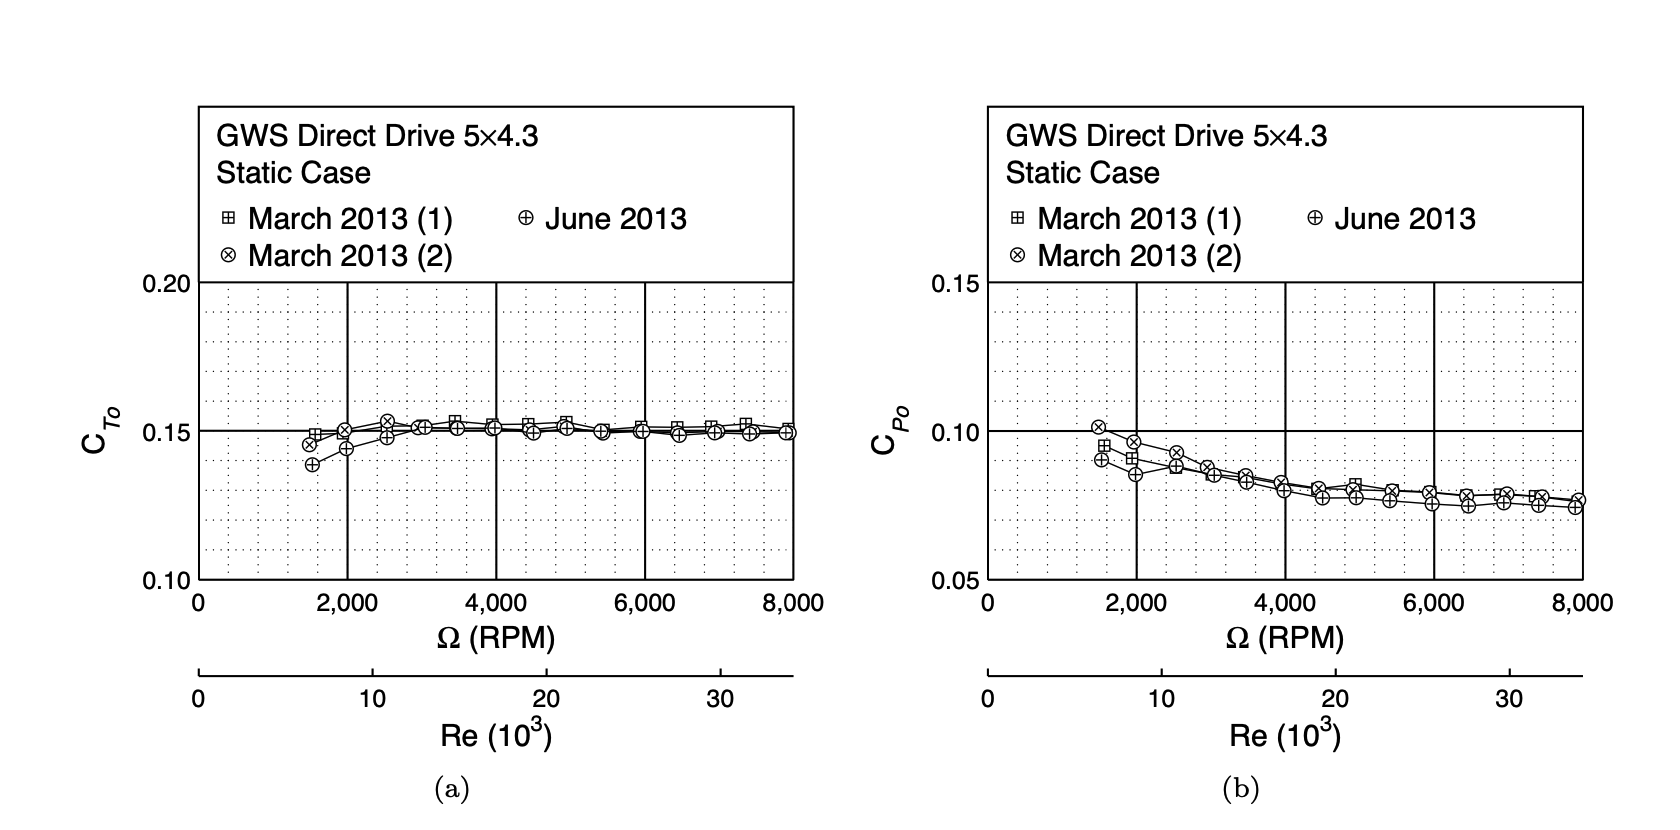

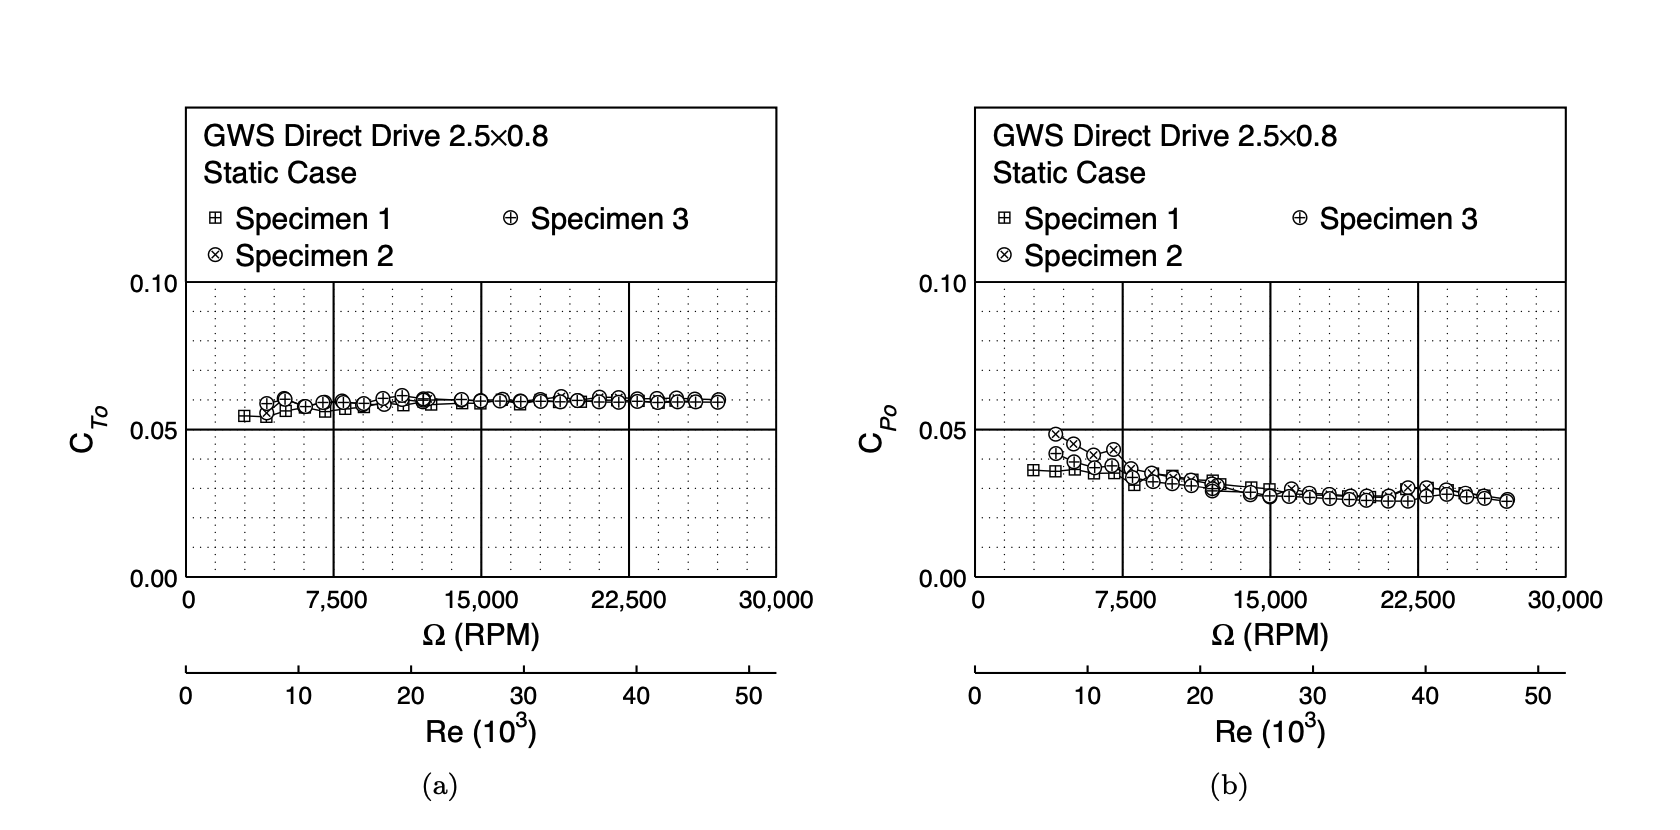

Example: for $D=$5" (127mm) propellers, $T_{M1}=5N$ $T_{M2}=4N$: 


$$ \Delta\tau_{M1-M2} = 1.01\times10^{-2} Nm$$

In [4]:
CpCt, D = sp.symbols(['CpCt', 'D'])

Thrust in the $B_1$ frame:

In [5]:
# Thrust in the $B_1$ frame:
Tb1 = sp.Matrix([(Tm1+Tm2)*sp.cos(thrust_angle_x)*sp.sin(thrust_angle_y), 
                 -(Tm1+Tm2)*sp.cos(thrust_angle_y)*sp.sin(thrust_angle_x), 
                 +(Tm1+Tm2)*sp.cos(thrust_angle_y)*sp.cos(thrust_angle_x)],
               )
Tb1

⎡(T_M1 + T_M2)⋅sin(θ_thrust_y)⋅cos(θₜₕᵣᵤₛₜ ₓ) ⎤
⎢                                             ⎥
⎢(-T_M1 - T_M2)⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y)⎥
⎢                                             ⎥
⎣(T_M1 + T_M2)⋅cos(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y) ⎦

In [6]:
Tb1.subs({thrust_angle_x:0, thrust_angle_y:0.1, Tm1:0.5, Tm2:0.5})

⎡0.0998334166468282⎤
⎢                  ⎥
⎢        0         ⎥
⎢                  ⎥
⎣0.995004165278026 ⎦

The thrust vector in $N(b_1)$ frame can be transformed into the $N(b)$ frame as follows:

Thrust throught the Center of Mass:
$$\vec{T_b} = \vec{T_{b1}}$$ and 

Torque in the $N(b)$ frame:
$$M_b = \vec{b} \times \vec{T_{b1}}$$

In [7]:
Tb = Tb1
Tb

⎡(T_M1 + T_M2)⋅sin(θ_thrust_y)⋅cos(θₜₕᵣᵤₛₜ ₓ) ⎤
⎢                                             ⎥
⎢(-T_M1 - T_M2)⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y)⎥
⎢                                             ⎥
⎣(T_M1 + T_M2)⋅cos(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y) ⎦

Check: if $T_{M1}$ and $T_{M2}$ are positive then the force exerted on the rocket should be in the positive z-direction.  The last term of the above vector is the component in the z-direction and will be positive for positive $T_{M1}$ and $T_{M2}$

In [8]:

motor_to_cm = sp.symbols('d_m') # in the positive z-direction
b=sp.Matrix([0,0,-motor_to_cm])
b

⎡ 0 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣-dₘ⎦

In [9]:

Mb=b.cross(Tb1)
Mb = Mb + sp.Matrix([0,0,CpCt*D*(-Tm2+Tm1)/(2*sp.pi)])
Mb

⎡dₘ⋅(-T_M1 - T_M2)⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y)⎤
⎢                                                ⎥
⎢-dₘ⋅(T_M1 + T_M2)⋅sin(θ_thrust_y)⋅cos(θₜₕᵣᵤₛₜ ₓ)⎥
⎢                                                ⎥
⎢              CpCt⋅D⋅(T_M1 - T_M2)              ⎥
⎢              ────────────────────              ⎥
⎣                      2⋅π                       ⎦

In [10]:
# Check 90 degree Theta_x Tm1 = Tm2 = Tm
Mb.subs({thrust_angle_x:sp.pi/2, thrust_angle_y:0, Tm2:Tm, Tm1:Tm})

⎡-2⋅T_M⋅dₘ⎤
⎢         ⎥
⎢    0    ⎥
⎢         ⎥
⎣    0    ⎦

In [11]:
# Check 30 degree Theta_y
Mb.subs({thrust_angle_x:0, thrust_angle_y:sp.pi/6, Tm2:Tm, Tm1:Tm})

⎡   0   ⎤
⎢       ⎥
⎢-T_M⋅dₘ⎥
⎢       ⎥
⎣   0   ⎦

In [12]:
# Check 30 degree Theta_x and Theta_y
Mb.subs({thrust_angle_x:sp.pi/3, thrust_angle_y:sp.pi/3,Tm2:Tm, Tm1:Tm})

⎡-√3⋅T_M⋅dₘ ⎤
⎢───────────⎥
⎢     2     ⎥
⎢           ⎥
⎢-√3⋅T_M⋅dₘ ⎥
⎢───────────⎥
⎢     2     ⎥
⎢           ⎥
⎣     0     ⎦

In [13]:
# Check 0 degree Theta_x and Theta_y Tm1=5, Tm2=4 , D=0.127 CpCt=0.5
Mb.subs({thrust_angle_x:sp.pi/3, thrust_angle_y:sp.pi/3,Tm2:4, Tm1:5, D:0.127, CpCt:0.5})

⎡-9⋅√3⋅dₘ ⎤
⎢─────────⎥
⎢    4    ⎥
⎢         ⎥
⎢-9⋅√3⋅dₘ ⎥
⎢─────────⎥
⎢    4    ⎥
⎢         ⎥
⎢ 0.03175 ⎥
⎢ ─────── ⎥
⎣    π    ⎦

In [14]:
sp.N(Mb.subs({thrust_angle_x:sp.pi/6, thrust_angle_y:sp.pi/6,
              Tm2:4, Tm1:5, 
              D:0.127, CpCt:0.5, motor_to_cm:0.5}))

⎡-1.94855715851499 ⎤
⎢                  ⎥
⎢-1.94855715851499 ⎥
⎢                  ⎥
⎣0.0101063388863354⎦

# Now change to Inertial (G) coordinates
First generate the Body to Global cosine matrix to transform vectors in the body coordinate system to the Global coordinate system 

$$ \vec{v}^G = C^{B-G}\vec{v}^B$$

In [15]:
from sympy.physics.vector import *

In [16]:
# create the Global frame
G = ReferenceFrame('G')

In [17]:
# create the Body frame
B = ReferenceFrame('B')

In [18]:
# define the symbols for rol-pitch-yaw
theta_roll, theta_pitch, theta_yaw = sp.symbols(['theta_roll', 'theta_pitch', 'theta_yaw'])
theta_roll, theta_pitch, theta_yaw

(θᵣₒₗₗ, θ_pitch, θ_yaw)

In [19]:
# create a vector in the body coords for testing
v = 0 * B.x + 0 * B.y + 1 * B.z

In [20]:
# this creates the cosine matrix for the rol-pitch-yaw transformation 
B.orient(G, 'Body', [theta_roll, theta_pitch, theta_yaw], '123')

In [21]:
G.dcm(B)

⎡                  cos(θ_pitch)⋅cos(θ_yaw)                                    
⎢                                                                             
⎢sin(θ_pitch)⋅sin(θᵣₒₗₗ)⋅cos(θ_yaw) + sin(θ_yaw)⋅cos(θᵣₒₗₗ)   -sin(θ_pitch)⋅si
⎢                                                                             
⎣-sin(θ_pitch)⋅cos(θᵣₒₗₗ)⋅cos(θ_yaw) + sin(θᵣₒₗₗ)⋅sin(θ_yaw)  sin(θ_pitch)⋅sin

 -sin(θ_yaw)⋅cos(θ_pitch)                          sin(θ_pitch)      ⎤
                                                                     ⎥
n(θᵣₒₗₗ)⋅sin(θ_yaw) + cos(θᵣₒₗₗ)⋅cos(θ_yaw)  -sin(θᵣₒₗₗ)⋅cos(θ_pitch)⎥
                                                                     ⎥
(θ_yaw)⋅cos(θᵣₒₗₗ) + sin(θᵣₒₗₗ)⋅cos(θ_yaw)   cos(θ_pitch)⋅cos(θᵣₒₗₗ) ⎦

In [22]:
v.express(G)

sin(θ_pitch) g_x + -sin(θᵣₒₗₗ)⋅cos(θ_pitch) g_y + cos(θ_pitch)⋅cos(θᵣₒₗₗ) g_z

### Test this transformation

In [23]:
# express v (defined in Body coords) in Global frame
v.express(G).subs({theta_pitch:0, theta_roll:0, theta_yaw:3})

g_z

In [24]:
v.express(G).subs({theta_roll:sp.pi/6, theta_pitch:0, theta_yaw:0})

           √3
-1/2 g_y + ── g_z
           2

In [25]:
v.express(G).subs({theta_roll:sp.pi/6, theta_pitch:sp.pi/6, theta_yaw:0})

          -√3
1/2 g_x + ──── g_y + 3/4 g_z
           4

In [26]:
# test this in the matrix mulitplication form
G.dcm(B).subs({theta_roll:sp.pi/6, theta_pitch:0, theta_yaw:0})*sp.Matrix([0,0,1])

⎡ 0  ⎤
⎢    ⎥
⎢-1/2⎥
⎢    ⎥
⎢ √3 ⎥
⎢ ── ⎥
⎣ 2  ⎦

In [27]:
G.dcm(B).subs({theta_roll:0, theta_pitch:sp.pi/6, theta_yaw:0})*sp.Matrix([0,0,1])

⎡1/2⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢√3 ⎥
⎢── ⎥
⎣2  ⎦

In [28]:
G.dcm(B).subs({theta_roll:sp.pi/6, theta_pitch:sp.pi/6, theta_yaw:0})*sp.Matrix([0,0,1])

⎡1/2 ⎤
⎢    ⎥
⎢-√3 ⎥
⎢────⎥
⎢ 4  ⎥
⎢    ⎥
⎣3/4 ⎦

# Now transform to Inertial (G) coordinates
For a rocket with 
$$\alpha = (\theta_{roll},\theta_{pitch}\theta_{yaw})$$

convert the thrust vector in body coordinates $T_B$ to G coordinates

complete the force balance by adding $mg$ in the global z-direction

$$ T^G_{tot} = C^{GB}T^B + m\vec{g}$$

In [29]:
T = sp.symbols('T')

In [30]:
g = sp.symbols('g')
mass = sp.symbols('m')

In [31]:
Tg = G.dcm(B)*Tb
Ttot = Tg + mass*sp.Matrix([0,0,g])

In [32]:
Ttot

⎡                                             -(-T_M1 - T_M2)⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅s
⎢                                                                             
⎢   (-T_M1 - T_M2)⋅(-sin(θ_pitch)⋅sin(θᵣₒₗₗ)⋅sin(θ_yaw) + cos(θᵣₒₗₗ)⋅cos(θ_yaw
⎢                                                                             
⎣g⋅m + (-T_M1 - T_M2)⋅(sin(θ_pitch)⋅sin(θ_yaw)⋅cos(θᵣₒₗₗ) + sin(θᵣₒₗₗ)⋅cos(θ_y

in(θ_yaw)⋅cos(θ_pitch)⋅cos(θ_thrust_y) + (T_M1 + T_M2)⋅sin(θ_pitch)⋅cos(θₜₕᵣᵤₛ
                                                                              
))⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y) + (T_M1 + T_M2)⋅(sin(θ_pitch)⋅sin(θᵣₒₗₗ)⋅cos
                                                                              
aw))⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅cos(θ_thrust_y) + (T_M1 + T_M2)⋅(-sin(θ_pitch)⋅cos(θᵣₒₗₗ)⋅

ₜ ₓ)⋅cos(θ_thrust_y) + (T_M1 + T_M2)⋅sin(θ_thrust_y)⋅cos(θ_pitch)⋅cos(θₜₕᵣᵤₛₜ 
                                                                              
(θ_yaw) + sin(θ_yaw)⋅cos(θᵣₒₗₗ))⋅sin(θ_thrust_y)⋅c

### Test this 

In [33]:
# Trivial case - rocket upright with thrust aligned with rocket
Ttot.subs({theta_roll:0, theta_pitch:0, theta_yaw:0,
        Tm1: T/2, Tm2:T/2,
        thrust_angle_x:0, thrust_angle_y:0})

⎡   0   ⎤
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎣T + g⋅m⎦

In [34]:
# Rocket pitched (around y) +30 degrees, aligned thrust
Ttot.subs({theta_roll:0, theta_pitch:sp.pi/6, theta_yaw:0,
        Tm1: T/2, Tm2:T/2,
        thrust_angle_x:0, thrust_angle_y:0})

⎡    T     ⎤
⎢    ─     ⎥
⎢    2     ⎥
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎢√3⋅T      ⎥
⎢──── + g⋅m⎥
⎣ 2        ⎦

In [35]:
vx, vy, vz = sp.symbols(['v_x', 'v_y', 'v_z'])

In [36]:
Vg = vx * G.x + vy * G.y + vz * G.z
Vg

vₓ g_x + v_y g_y + v_z g_z

From newton's second law:
$$\vec{F} = m\frac{dv}{dt}$$
solving for $\frac{dv}{dt}$:
$$\frac{dv}{dt} = \frac{\vec{F}}{m}$$

In [37]:
Ttot_over_m = Ttot/mass

In [38]:
Ttot_over_m

⎡                                             -(-T_M1 - T_M2)⋅sin(θₜₕᵣᵤₛₜ ₓ)⋅s
⎢                                             ────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢   (-T_M1 - T_M2)⋅(-sin(θ_pitch)⋅sin(θᵣₒₗₗ)⋅sin(θ_yaw) + cos(θᵣₒₗₗ)⋅cos(θ_yaw
⎢   ──────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢g⋅m + (-T_M1 - T_M2)⋅(sin(θ_pitch)⋅sin(θ_yaw)⋅cos(θᵣₒₗₗ) + sin(θᵣₒₗₗ)⋅cos(θ_y
⎢─────────────────────────────────────────────────────────────────────────────
⎣                                                                             

in(θ_yaw)⋅cos(θ_pitch)⋅cos(θ_thrust_y) + (T_M1 + T_M2)⋅sin(θ_pitch)⋅cos(θₜₕᵣᵤₛ
───────────────────────────────────────────────────

In [39]:
F_over_m_eval = sp.lambdify((
                        Tm1, Tm2,  
                        thrust_angle_x,thrust_angle_y,             
                        theta_roll, theta_pitch, theta_yaw, mass,
                        g
            ), Ttot_over_m, 'numpy')

In [66]:
F_over_m_eval(6,
              6,
              np.pi/6,
              np.pi/6,
              0,
              0,
              0,
              1,
             -9.81)

array([[ 5.19615242],
       [-5.19615242],
       [-0.81      ]])

In [41]:
? F_over_m_eval

Signature:
 F_over_m_eval(
    T_M1,
    T_M2,
    theta_thrust_x,
    theta_thrust_y,
    theta_roll,
    theta_pitch,
    theta_yaw,
    m,
    g,
)
Docstring:
Created with lambdify. Signature:

func(T_M1, T_M2, theta_thrust_x, theta_thrust_y, theta_roll,
        theta_pitch, theta_yaw, m, g)

Expression:

Matrix([[(-(-T_M1 - T_M2)*sin(theta_thrust_x)*sin(theta_yaw)*cos(theta_pitc...

Source code:

def _lambdifygenerated(T_M1, T_M2, theta_thrust_x, theta_thrust_y, theta_roll, theta_pitch, theta_yaw, m, g):
    return array([[(-(-T_M1 - T_M2)*sin(theta_thrust_x)*sin(theta_yaw)*cos(theta_pitch)*cos(theta_thrust_y) + (T_M1 + T_M2)*sin(theta_pitch)*cos(theta_thrust_x)*cos(theta_thrust_y) + (T_M1 + T_M2)*sin(theta_thrust_y)*cos(theta_pitch)*cos(theta_thrust_x)*cos(theta_yaw))/m], [((-T_M1 - T_M2)*(-sin(theta_pitch)*sin(theta_roll)*sin(theta_yaw) + cos(theta_roll)*cos(theta_yaw))*sin(theta_thrust_x)*cos(theta_thrust_y) + (T_M1 + T_M2)*(sin(theta_pitch)*sin(theta_roll)*cos(theta_yaw) + sin(

In [64]:
g_ = -9.81
T_M1 = 0
T_M2 = 0
theta_thrust_x = float(0.01)
theta_thrust_y = float(0.01)
m_ = 1

In [77]:
F_over_m_eval(
    5,
    5,
    float(sp.N(sp.pi/6)),
    float(sp.N(sp.pi/6)),
    0,
    0,
    0,
    m_,
    g_,
)

array([[ 4.33012702],
       [-4.33012702],
       [-2.31      ]])

In [74]:
params = (T_M1, T_M2, theta_thrust_x, theta_thrust_y, m_, g_)

In [44]:
params

(0, 0, 0.01, 0.0, 1, -9.81)

State vector:

$$ state=\begin{bmatrix}
         \dot{x}\\
         \dot{y}\\
         \dot{z}\\
         x\\
         y\\
         z
         \end{bmatrix} $$


In [45]:
def rocket(t, state, T_M1, T_M2, theta_thrust_x, theta_thrust_y, m, g):
  ddt = np.zeros(6)
  # temporary remove for full state system
  theta_roll = 0
  theta_pitch = 0
  theta_yaw = 0
  
  if t < .3:
    theta_thrust_x = 0.2
  else: 
    theta_thrust_x = -0.1

  if t < 1.:
    T_M1 = 15
    T_M2 = 15
  else: 
    T_M1 = 0
    T_M2 = 0
    
  if t < 2:
    theta_thrust_y = .02
  elif t < 4:
    theta_thrust_y = -0.02
  else:
    theta_thrust_y = 0
    
  temp = F_over_m_eval(T_M1, T_M2, theta_thrust_x, theta_thrust_y,
                 theta_roll, theta_pitch, theta_yaw, 
                 m, g)
  
  
  ddt[0] = temp[0,0]
  ddt[1] = temp[1,0]
  ddt[2] = temp[2,0]
  ddt[3:6] = state[0:3]

  return ddt

In [46]:
y0 = np.array([0,0,0,0,0,100])
state = y0

In [47]:
state

array([  0,   0,   0,   0,   0, 100])

In [48]:
temp=rocket(.5, state, 5, 5, 0, 0, 1, -9.81)
temp

array([ 0.5969627 ,  2.99440352, 20.03415513,  0.        ,  0.        ,
        0.        ])

In [49]:
t_span = (0.0, 5.0)
y0 = np.array([0,0,0,0,0,0])
t_eval = np.arange(0,5,0.01)

In [50]:
from scipy.integrate import *
import matplotlib.pyplot as plt

In [51]:
def event(t,state,p1,p2,p3,p4,p5,p6 ):
  return state[5]- 0.1
event.terminal = True

In [52]:

result_solve_ivp = solve_ivp(rocket, t_span, y0, t_eval=t_eval,
                             events=[], args=params, method='LSODA')

In [53]:
import pandas as pd
state_labels = ['V_x', 'V_y', 'V_z', 'P_x', 'P_y', 'P_z']
resdf = pd.DataFrame(result_solve_ivp.y.T,columns=state_labels, index=result_solve_ivp.t)

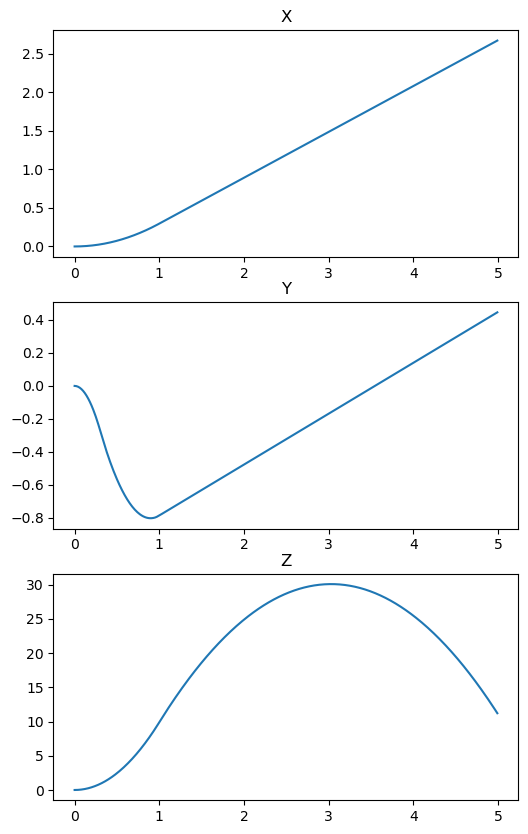

In [54]:
fig, ax = plt.subplots(3,1, figsize=(6,10))
ax[0].plot(resdf.index,resdf['P_x'])
ax[0].set_title('X')
ax[1].plot(resdf.index,resdf['P_y'])
ax[1].set_title('Y')
ax[2].plot(resdf.index,resdf['P_z'])
ax[2].set_title('Z')
plt.show()

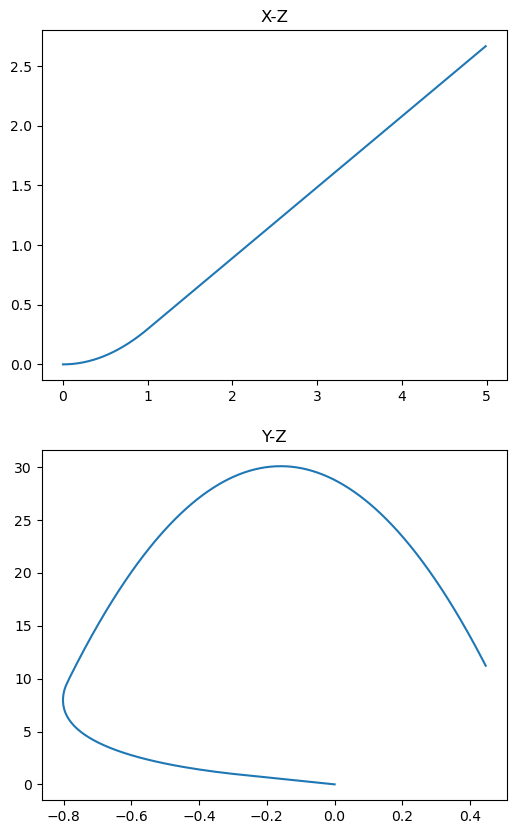

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(6,10))
ax[0].plot(resdf.index,resdf['P_x'])
ax[0].set_title('X-Z')
ax[1].plot(resdf['P_y'],resdf['P_z'])
ax[1].set_title('Y-Z')

plt.show()

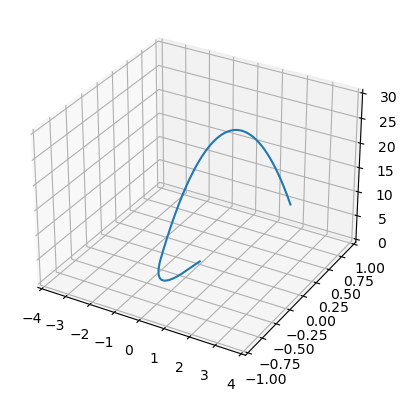

In [56]:
ax = plt.figure().add_subplot(projection='3d')



ax.plot(resdf['P_x'], resdf['P_y'], resdf['P_z'])
ax.set_xlim([-4,4])
ax.set_ylim([-1,1])

plt.show()



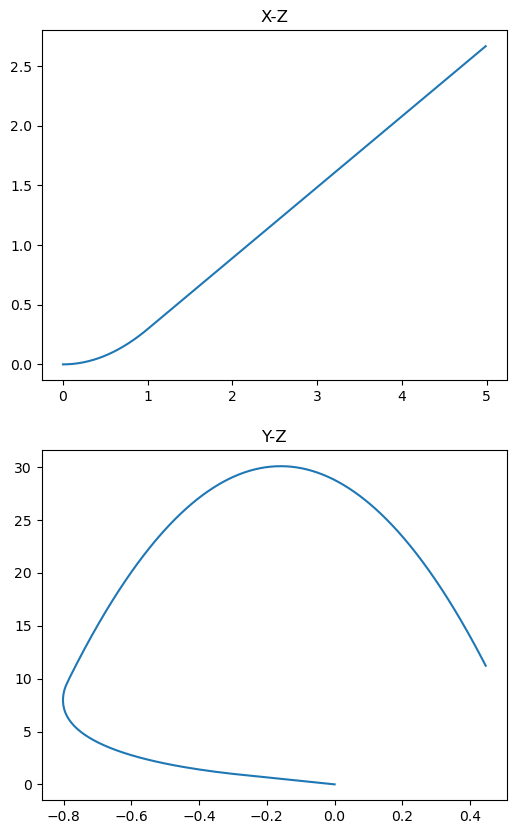

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(6,10))
ax[0].plot(resdf.index,resdf['P_x'])
ax[0].set_title('X-Z')
ax[1].plot(resdf['P_y'],resdf['P_z'])
ax[1].set_title('Y-Z')

plt.show()

In [58]:
resdf

,V_x,V_y,V_z,P_x,P_y,P_z
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.005880,-0.059589,0.195861,0.000029,-0.000298,0.000979
0.02,0.011760,-0.119178,0.391722,0.000118,-0.001192,0.003917
0.03,0.017640,-0.178767,0.587584,0.000265,-0.002681,0.008814
0.04,0.023520,-0.238356,0.783445,0.000470,-0.004767,0.015669
...,...,...,...,...,...,...
4.95,0.594269,0.308457,-18.850018,2.643748,0.433517,11.981896
4.96,0.594269,0.308457,-18.948118,2.649691,0.436602,11.792905
4.97,0.594269,0.308457,-19.046218,2.655634,0.439686,11.602934
4.98,0.594269,0.308457,-19.144318,2.661576,0.442771,11.411981


Check this out for rotational bodies
https://ae640a.github.io/assets/winter17/slides/Lecture%203.pdf

Expand the state vector:

$$ state=\begin{bmatrix}
         \dot{x}\\
         \dot{y}\\
         \dot{z}\\
         x\\
         y\\
         z\\
         \dot{\theta_x}\\
         \dot{\theta_y}\\
         \dot{\theta_z}\\
         \theta_x\\
         \theta_y\\
         \theta_z
         \end{bmatrix} $$
